#Identification of Employee Turnover Risk using Machine Learning: A Path to Enhanced Organizational Insights for Retention Strategies

Technical Notebook

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## Create the SQLITE3 Database, Tables and INSERT records from HR Case Study .csv files
Once this step has been completed, this code does not need to be ran again - it will also return an error message as the tables and data have already been loaded

In [ ]:
# Connect to a sqlite3 database, or create one if it does not exist
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

# Create the cursor object
cursor = conn.cursor()

# Execute CREATE TABLE commands to create the required tables in the hr_case_study.db

# Create employee_survey_data table
cursor.execute('''CREATE TABLE IF NOT EXISTS employee_survey_data
                (EmployeeID TEXT PRIMARY KEY, EnvironmentSatisfaction TEXT, JobSatisfaction TEXT, WorkLifeBalance TEXT)''')

# Create manager_survey_data table
cursor.execute('''CREATE TABLE IF NOT EXISTS manager_survey_data
                (EmployeeID TEXT PRIMARY KEY, JobInvolvement TEXT, PerformanceRating TEXT)''')

#create general_data table
cursor.execute('''CREATE TABLE IF NOT EXISTS general_data
                (Age INT, Attrition TEXT, BusinessTravel TEXT, Department TEXT, DistanceFromHome INT, Education INT, EducationField TEXT, EmployeeCount INT, EmployeeID TEXT,
                Gender TEXT, JobLevel INT, JobRole TEXT, MaritalStatus TEXT, MonthlyIncome INT, NumCompaniesWorked TEXT, Over18 TEXT, PercentSalaryHike INT, 
                StandardHours INT, StockOptionLevel INT, TotalWorkingYears TEXT, TrainingTimesLastYear TEXT, YearsAtCompany TEXT, YearsSinceLastPromotion TEXT, YearsWithCurrentManager TEXT)''')

#save the changes to the database
conn.commit()

##### Write the data from .csv files to each table ##### 

with open('/content/drive/My Drive/MS-ADS Capstone Project/data/employee_survey_data.csv', 'r') as csvfile:
    #read contents of .csv file and insert data into SQLite database
    csvreader = csv.reader(csvfile)
    #skip the first row of data
    next(csvreader)
    for row in csvreader:
        cursor.execute("INSERT or REPLACE INTO employee_survey_data (EmployeeID, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance) VALUES (?, ?, ?, ?)", (row[0], row[1], row[2], row[3]))
#save changes and commit to database
conn.commit()

with open('/content/drive/My Drive/MS-ADS Capstone Project/data/manager_survey_data.csv', 'r') as csvfile:
    #read contents of .csv file and insert data into SQLite database
    csvreader = csv.reader(csvfile)
    #skip the first row of data
    next(csvreader)
    for row in csvreader:
        cursor.execute("INSERT or REPLACE INTO manager_survey_data (EmployeeID, JobInvolvement, PerformanceRating) VALUES (?, ?, ?)", (row[0], row[1], row[2]))
#save changes and commit to database
conn.commit()

with open('/content/drive/My Drive/MS-ADS Capstone Project/data/general_data.csv', 'r') as csvfile:
    #read contents of .csv file and insert data into SQLite database
    csvreader = csv.reader(csvfile)
    #skip the first row of data
    next(csvreader)
    for row in csvreader:
        cursor.execute("""INSERT INTO general_data (Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EmployeeCount, 
        EmployeeID, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, Over18, PercentSalaryHike, StandardHours, StockOptionLevel, 
        TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrentManager) 
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""",
                       (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12], row[13], row[14], row[15], 
                        row[16], row[17], row[18],row[19], row[20], row[21], row[22], row[23]))
#save changes and commit to database
conn.commit()

#close the cursor and connection objects
cursor.close()
conn.close()

### Query the Database

#### SELECT all records from general_data TABLE

In [ ]:
#connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
#create cursor object and query table
cursor = conn.cursor()
cursor.execute('SELECT * FROM general_data')

#identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

#fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
general_df = pd.DataFrame(rows, columns = col_names)

#close the cursor and connection objects
cursor.close()
conn.close()

#### SELECT all records from employee_survey_data TABLE

In [ ]:
#connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
#create cursor object and query table
cursor = conn.cursor()
cursor.execute('SELECT * FROM employee_survey_data')

#identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

#fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
employee_survey_df = pd.DataFrame(rows, columns = col_names)

#close the cursor and connection objects
cursor.close()
conn.close()

#### SELECT all records from the manger_survey_data TABLE

In [ ]:
#connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
#create cursor object and query table
cursor = conn.cursor()
cursor.execute('SELECT * FROM manager_survey_data')

#identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

#fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
manager_survey_df = pd.DataFrame(rows, columns = col_names)

#close the cursor and connection objects
cursor.close()
conn.close()

#### Master Query to get all data needed from database

In [ ]:
#connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
#create cursor object and query table
cursor = conn.cursor()
cursor.execute("""SELECT * 
                  FROM general_data as g

                  LEFT JOIN manager_survey_data m
                    ON g.EmployeeID = m.EmployeeID
                    -- AND g.EmployeeID = e.EmployeeID


                  LEFT JOIN employee_survey_data as e
                    ON g.EmployeeID = e.EmployeeID 
                    -- AND g.EmployeeID = m.EmployeeID""")

#identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

#fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
total_df = pd.DataFrame(rows, columns = col_names)

#close the cursor and connection objects
cursor.close()
conn.close()

In [ ]:
print(total_df.shape)
total_df.head()

(13230, 31)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,EmployeeID,JobInvolvement,PerformanceRating,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,0,0,1,3,3,1,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,5,1,4,2,2,4,2,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5,0,3,3,3,3,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,7,5,4,2,3,4,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,6,0,4,5,3,3,5,4,1,3


#### Check each dataframe for correct importing

In [ ]:
general_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,Y,11,8,0,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0,Y,23,8,1,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1,Y,15,8,3,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3,Y,11,8,3,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4,Y,12,8,2,9,2,6,0,4


In [ ]:
employee_survey_df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3,4,2
1,2,3,2,4
2,3,2,2,1
3,4,4,4,3
4,5,4,1,3


In [ ]:
manager_survey_df.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
print(general_df.shape)
general_df.head()

(13230, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,Y,11,8,0,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0,Y,23,8,1,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1,Y,15,8,3,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3,Y,11,8,3,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4,Y,12,8,2,9,2,6,0,4


In [ ]:
general_df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
EmployeeID                 object
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked         object
Over18                     object
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears          object
TrainingTimesLastYear      object
YearsAtCompany             object
YearsSinceLastPromotion    object
YearsWithCurrentManager    object
dtype: object

Data seems to have imported exactly as expected, however, some columns that are objects could be integers. 



In [ ]:
# checking for nulls

general_df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
dtype: int64

In [ ]:
general_df['NumCompaniesWorked'].value_counts()

1     4674
0     1758
3     1422
2     1314
4     1245
7      666
6      624
5      561
9      468
8      441
NA      57
Name: NumCompaniesWorked, dtype: int64

In [ ]:
# there are some "NA" strings in dataframe; we should fill with np.nan

general_df.replace('NA', np.nan, inplace = True)

In [ ]:
general_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         57
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears          27
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrentManager     0
dtype: int64

In [ ]:
general_df[['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrentManager']] = general_df[['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrentManager']].astype(int)

There are still nulls in NumCompaniesWorked and TotalWorkingYears; we will devise a plan to deal with those

### Initial Exploratory Data Analysis (EDA)

In [ ]:
general_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,PercentSalaryHike,StandardHours,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager
count,13230.000000,13230.000000,13230.000000,13230.0,13230.000000,13230.000000,13230.000000,13230.0,13230.000000,13230.000000,13230.000000,13230.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,15.209524,8.0,0.793878,7.008163,2.187755,4.123129
std,9.132611,8.104413,1.023855,0.0,1.106605,47065.330417,3.658831,0.0,0.851819,6.124672,3.221456,3.567057
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,12.000000,8.0,0.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,14.000000,8.0,1.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,18.000000,8.0,1.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,25.000000,8.0,3.000000,40.000000,15.000000,17.000000


It seems everyone's standard hours are 8 per day. EmployeeCount is 1 for each observation. 

It seems about 50% were promoted within the last year. 75% have been at the company for 9 years or less. 

Monthly Income is skewed right, as expected with companies.

It seems education type is distributed centrally, and with age as well.

In [ ]:
employee_survey_df.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410,4410,4410,4410
unique,4410,5,5,5
top,1,3,4,3
freq,1,1350,1367,2660


In [ ]:
manager_survey_df.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410,4410,4410
unique,4410,4,2
top,1,3,3
freq,1,2604,3732


#### Exploratory Data Analysis

In [ ]:
gen_df = total_df

In [ ]:
#create a new dataframe names dups that is a boolean array that indicates whether each row is a duplicate
dups = gen_df.duplicated()

#view the duplicated rows for validation
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8820


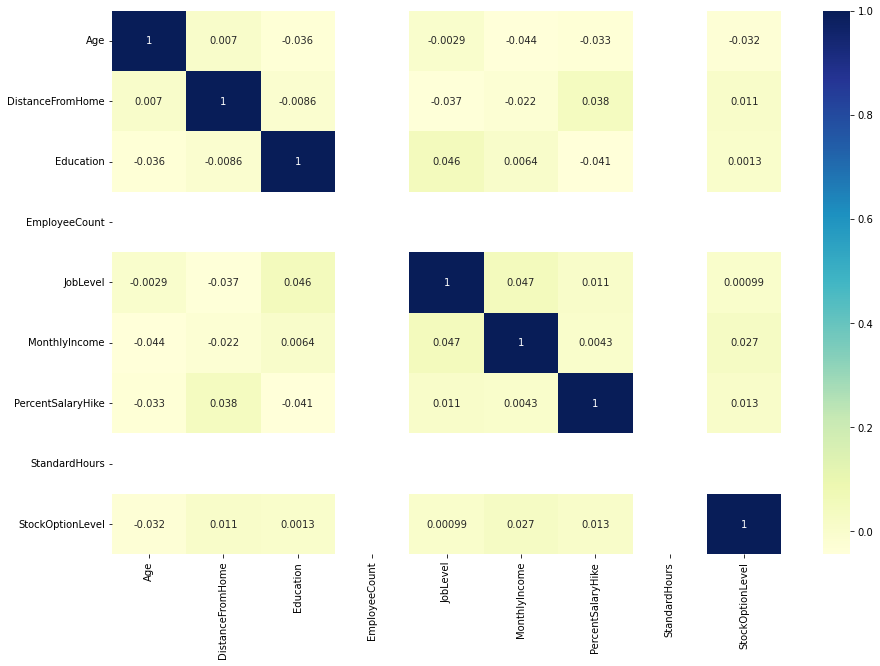

In [ ]:
#create a function to explore correlation of all variables
def correlation_heatmap(gen_df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(gen_df.corr(),annot=True,cmap="YlGnBu")
    
correlation_heatmap(gen_df)

In [ ]:
#identify the target varible for the barcharts
target_variable = 'Attrition'

#identify the variables to exclude from barchart
excluded_variables = ('EmployeeID','MonthlyIncome')

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


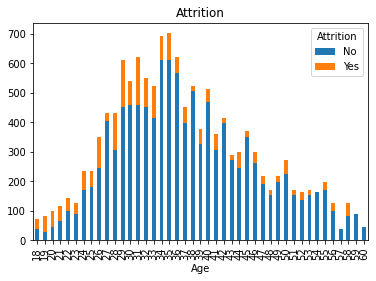

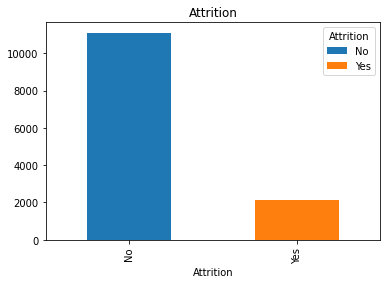

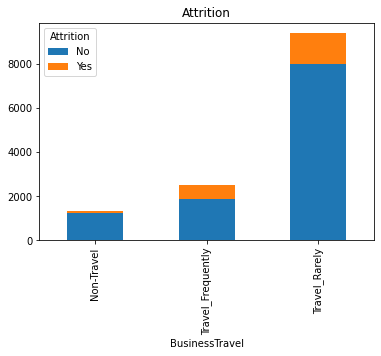

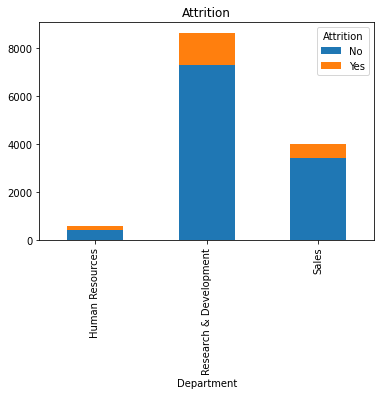

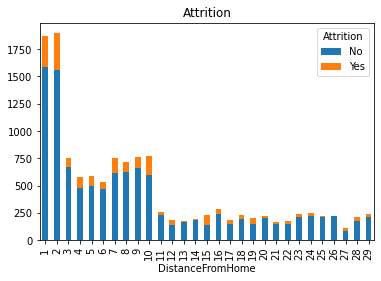

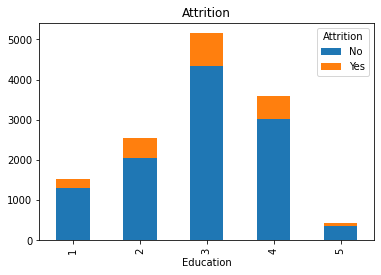

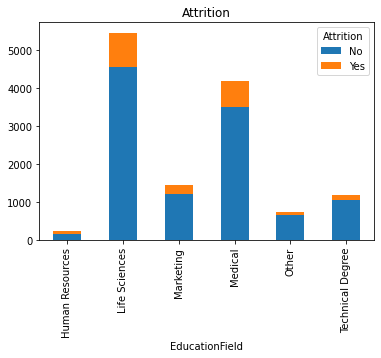

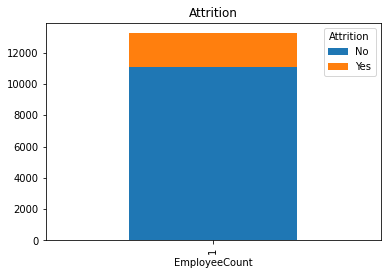

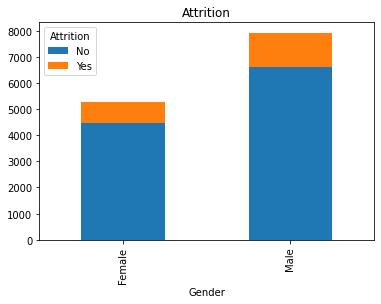

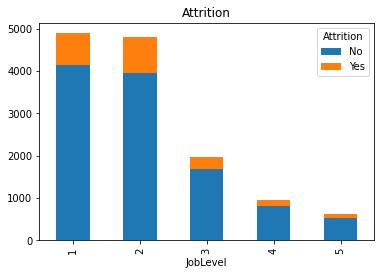

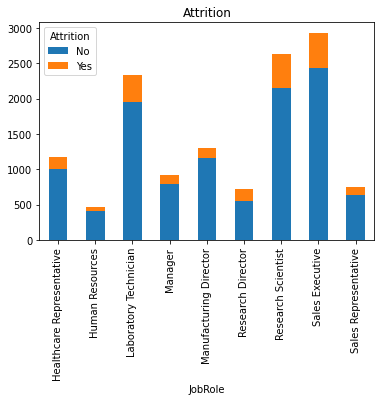

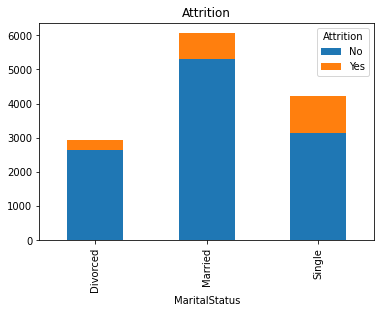

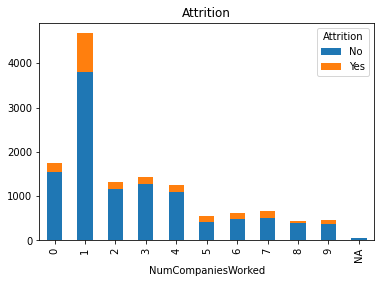

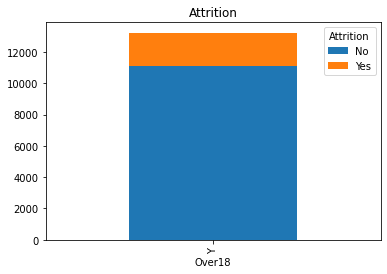

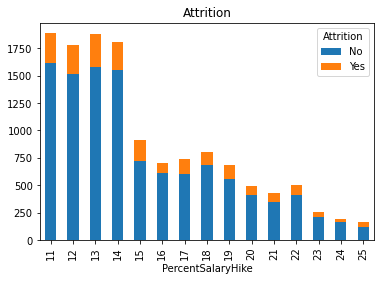

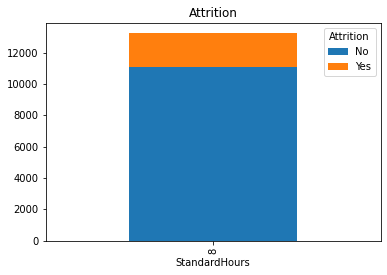

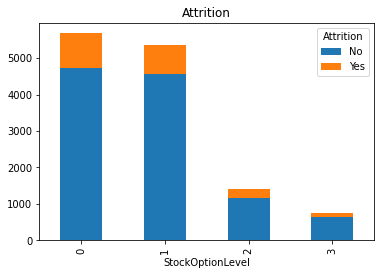

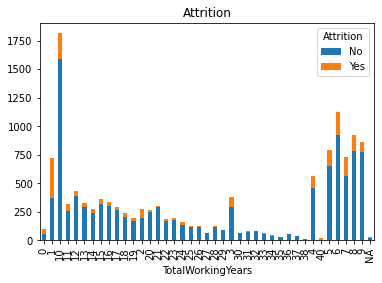

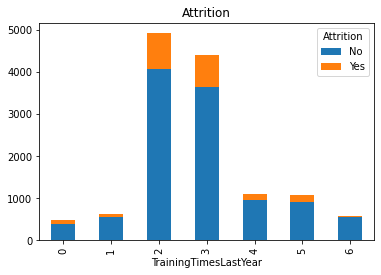

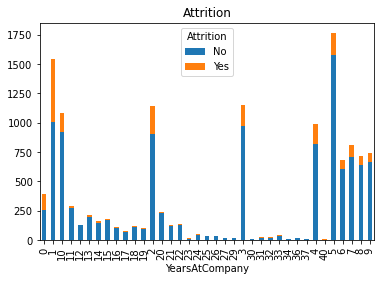

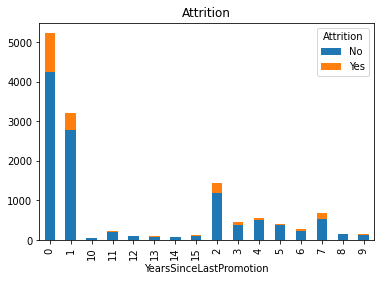

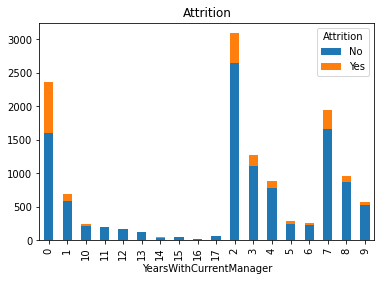

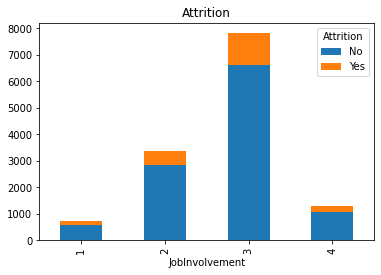

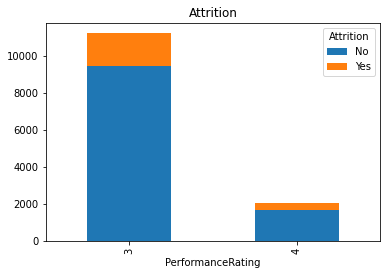

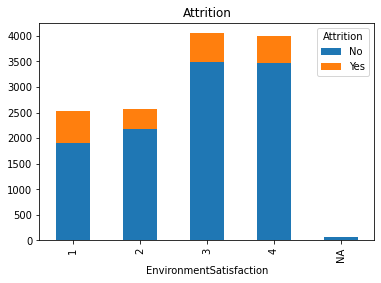

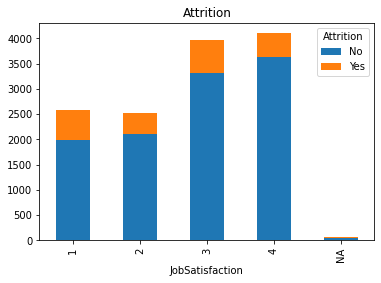

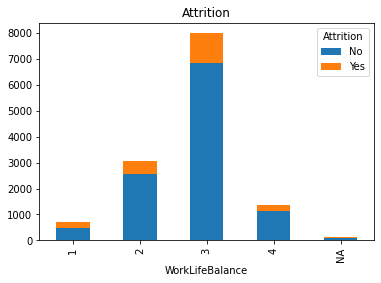

In [ ]:
#create function to produce barcharts by attrition
def stacked_barchart(df):
    #place column names into an object
    col_names = df.columns
    #iterate through column names
    for name in col_names:
        if name in excluded_variables:
            pass
        else:
            #create the stacked barchart for each attritubte
            stacked_bar = pd.crosstab(df[name], df[target_variable])
            stacked_bar.plot(kind='bar', stacked = True
                 , title ='Attrition')

#call the function with the dataframe
stacked_barchart(gen_df)   

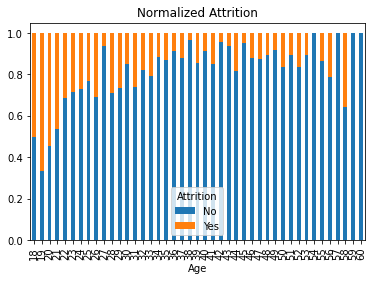

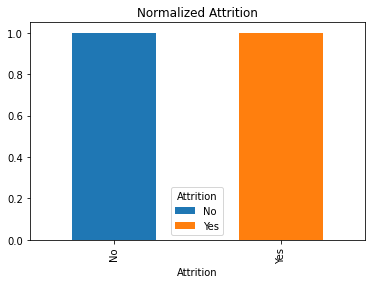

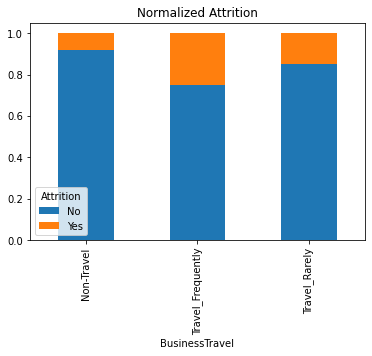

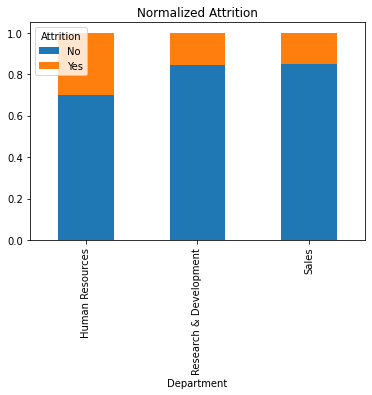

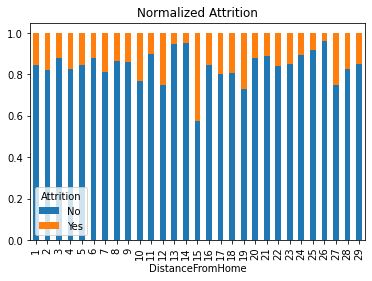

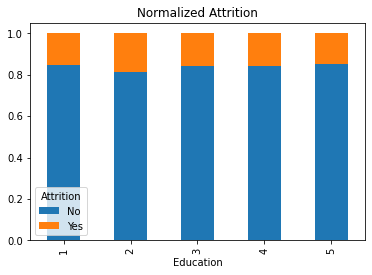

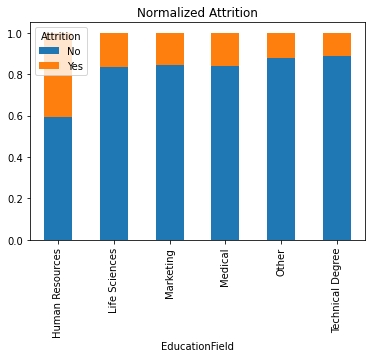

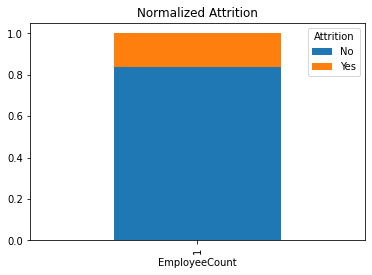

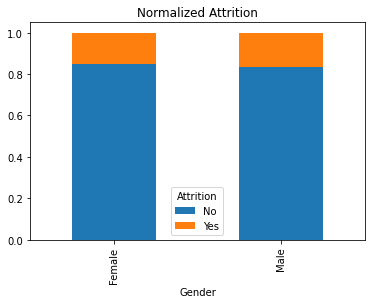

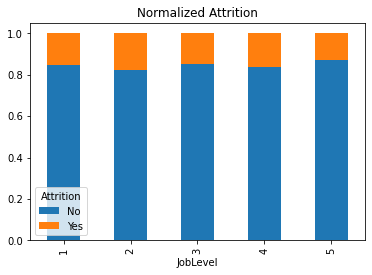

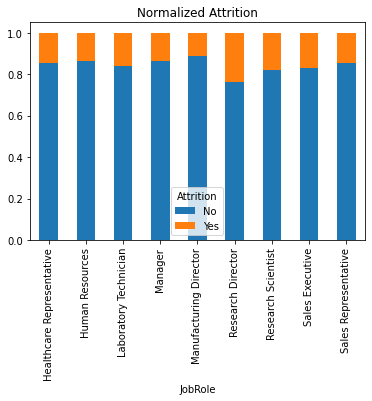

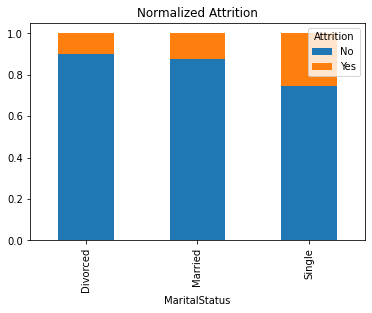

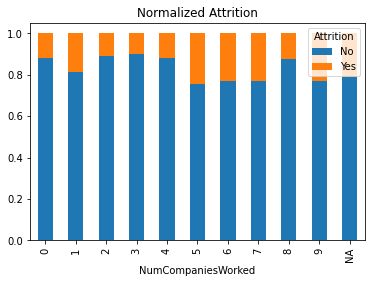

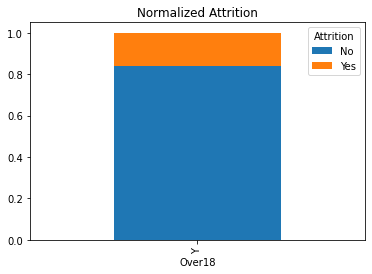

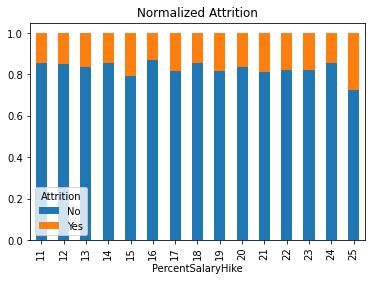

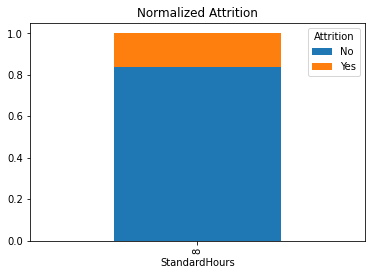

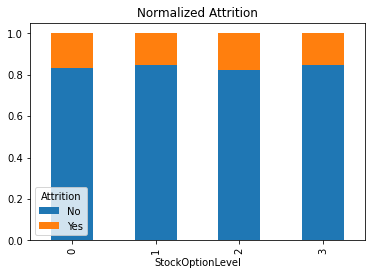

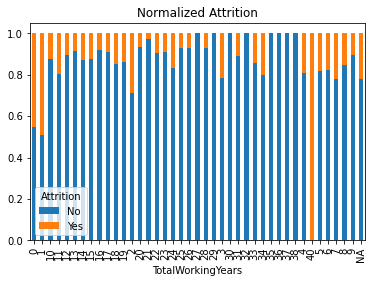

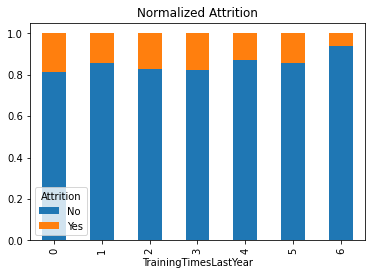

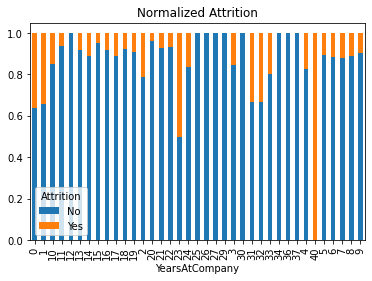

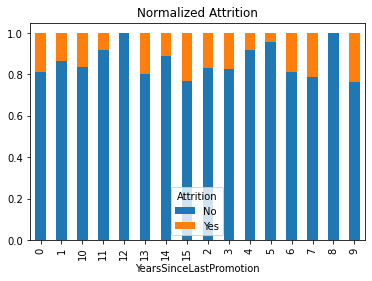

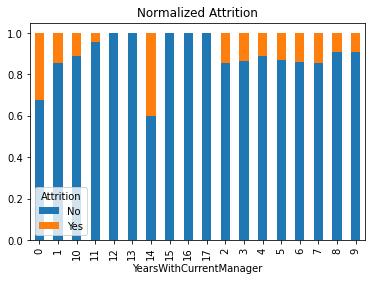

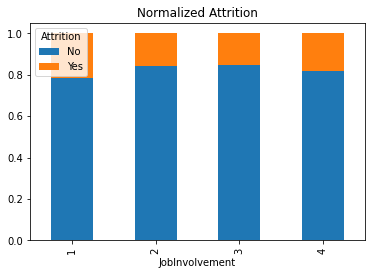

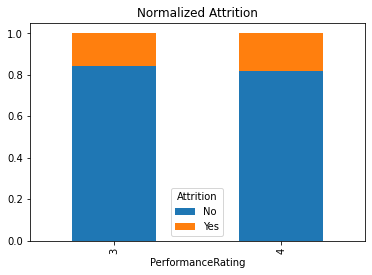

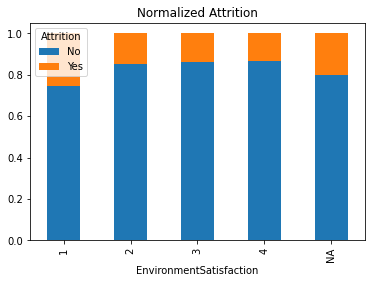

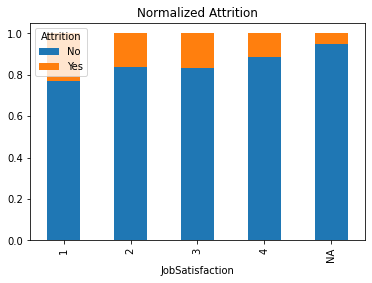

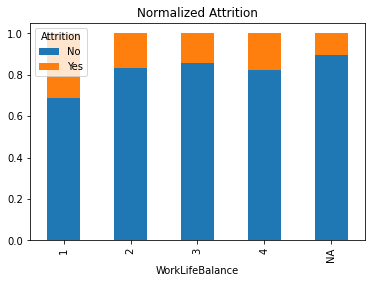

In [ ]:
def normalized_barchart(df):
        #place column names into an object
    col_names = df.columns
    #iterate through column names
    for name in col_names:
        if name in excluded_variables:
            pass
        else:
            stacked_bar = pd.crosstab(df[name], df[target_variable])
            stacked_bar_norm = stacked_bar.div(stacked_bar.sum(1),axis=0)
            stacked_bar_norm.plot(kind='bar',stacked=True, 
                      title='Normalized Attrition')

#call the function with the dataframe
normalized_barchart(gen_df)  